<a href="https://colab.research.google.com/github/Thuy01234567/AIO/blob/main/Modul4_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chuẩn bị thư viện và dataset

In [81]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column (data, index):
  # your code here ****************************
  result = []
  for row in data:
    result.append(row[index])
  return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter =',', skip_header =1).tolist()
  N = len( data)

  # get tv(index =0)
  tv_data = get_column(data, 0)

  # get radio(index =1)
  radio_data = get_column(data, 1)

  # get newspaper(index =2)
  newspaper_data = get_column(data, 2)
  # get sales(index =3)
  sales_data = get_column(data, 3)

  # building X input and y output for training
  X =[tv_data, radio_data, newspaper_data]
  y = sales_data
  return X, y


In [82]:
X, y = prepare_data ('/content/advertising.csv')
list =[sum(X [0][:5]), sum(X [1][:5]), sum(X [2][:5]), sum(y [:5])]
print(list)


[624.1, 175.10000000000002, 300.5, 78.9]


In [80]:
def initialize_params ():
  w1 = random.gauss(mu =0.0, sigma =0.01)
  w2 = random.gauss(mu =0.0, sigma =0.01)
  w3 = random.gauss(mu =0.0, sigma =0.01)
  b = 0
  return w1, w2, w3, b

In [83]:
def initialize_params ():
  w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355,3 -0.002307860847821344, 0)
  return w1, w2, w3, b

In [84]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
  losses = []
  w1, w2, w3, b = initialize_params ()

  if isinstance(y_data, float):
    y_data = [y_data]

  N = len( y_data)
  for epoch in range(epoch_max):
    for i in range(N):
      # get a sample
      x1 = X_data [0][i]
      x2 = X_data [1][i]
      x3 = X_data [2][i]

      y = y_data [i]

      # compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      # compute loss
      loss = compute_loss_mse(y, y_hat)

      # compute gradient w1, w2, w3, b
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b (y, y_hat)

      # update parameters
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)
      b = update_weight_b (b, dl_db, lr)

      # logging
      losses.append(loss)
  return(w1, w2, w3,b, losses)

In [85]:
def predict(x1, x2, x3, w1, w2, w3, b):
  # your code here ****************************
  result = w1 * x1 + w2 * x2 + w3 * x3 + b
  return result

In [86]:
y = predict(x1 =1, x2 =1, x3 =1, w1 =0, w2 =0.5, w3 =0, b =0.5)
print (y)

1.0


In [87]:
def compute_loss_mse(y_hat, y):
  # your code here ****************************
  #sử dụng Mean Squared Error
  loss = (y - y_hat) ** 2
  return loss

In [88]:
l = compute_loss_mse(y_hat =1, y =0.5)
print(l)

0.25


In [89]:
def compute_loss_mae(y_hat, y):
  # your code here ****************************
  #sử dụng Mean Absolute Error
  loss = abs(y - y_hat)
  return loss

In [90]:
l = compute_loss_mae (y_hat =1, y =0.5)
print(l)

0.5


In [91]:
# compute gradient
def compute_gradient_wi (xi, y, y_hat):
  # your code here ****************************
  # tính đạo hàm của hàm loss L = (ˆy − y)**2 theo wi
  dl_dwi = -2 * xi * (y - y_hat)
  return dl_dwi


def compute_gradient_b (y, y_hat):
  # your code here ****************************
  # tính đạo hàm của hàm loss L= (ˆy − y)**2 theo b
  dl_db = -2 * (y - y_hat)
  return dl_db


In [92]:
g_wi = compute_gradient_wi(xi =1.0, y =1.0, y_hat =0.5)
print(g_wi)

-1.0


In [93]:
g_b = compute_gradient_b(y =2.0, y_hat =0.5)
print(g_b)

-3.0


In [94]:
# update weights
def update_weight_wi(wi, dl_dwi, lr):

  # your code here ****************************
  wi = wi - lr * dl_dwi
  return wi

def update_weight_b (b, dl_db, lr):
  # your code here ****************************
  b = b - lr * dl_db
  return b

In [95]:
after_wi = update_weight_wi(wi =1.0, dl_dwi = -0.5, lr = 1e-5)
print (after_wi)

1.000005


In [96]:
after_b = update_weight_b(b =0.5, dl_db = -1.0, lr = 1e-5)
print(after_b)

0.50001


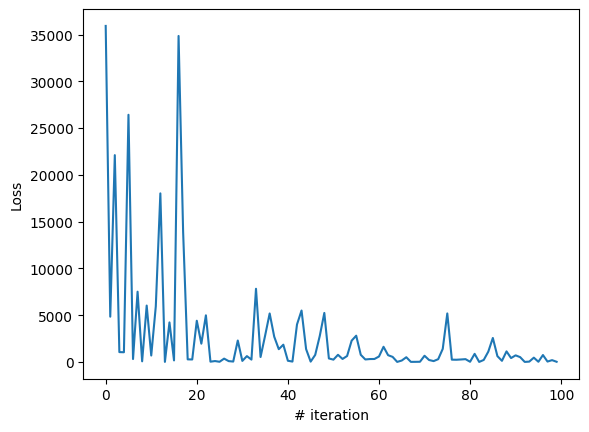

In [97]:
X, y = prepare_data('/content/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression (X, y)
plt.plot(losses [:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.show()

In [99]:
X, y = prepare_data ('/content/advertising.csv')
(w1, w2, w3,b, losses) = implement_linear_regression (X, y,1000)
print( w1, w2, w3)

0.06576198951276759 0.13778788567236466 0.007941197067705243


In [100]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data ('/content/advertising.csv')
(w1, w2, w3,b, losses) = implement_linear_regression (X, y, epoch_max =50, lr =1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print (f'predicted sales is {sales}')

predicted sales is 8.171499274734634


In [111]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=1000, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Assuming X_data is a list of lists where each inner list
            # represents a sample and contains values for TV, Radio, Newspaper
            x1 = X_data[i][0]  # TV data for the i-th sample
            x2 = X_data[i][1]  # Radio data for the i-th sample
            x3 = X_data[i][2]  # Newspaper data for the i-th sample
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mse(y, y_hat)
            loss_total += loss

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters (unchanged)
        w1 = update_weight_wi(w1, dw1_total, lr)
        w2 = update_weight_wi(w2, dw2_total, lr)
        w3 = update_weight_wi(w3, dw3_total, lr)
        b = update_weight_b(b, db_total, lr)

        # logging
        losses.append(loss_total/N)

    return (w1, w2, w3, b, losses)

In [114]:
X, y = prepare_data ('/content/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples (X, y, epoch_max =1000, lr =1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.show()

OverflowError: (34, 'Numerical result out of range')

In [115]:
X, y = prepare_data('/content/advertising.csv')
# using MSE loss
(w1, w2, w3,b, losses) = implement_linear_regression_nsamples (X, y, epoch_max =1000, lr =1e-5)

print (w1, w2, w3)

OverflowError: (34, 'Numerical result out of range')

In [104]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter =',', skip_header =1).tolist ()

  # get tv(index =0)
  tv_data = get_column(data, 0)

  # get radio(index =1)
  radio_data = get_column(data, 1)

  # get newspaper(index =2)
  newspaper_data = get_column(data, 2)

  # get sales(index =3)
  sales_data = get_column(data, 3)

  # building X input and y output for training
  # Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip( tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X, y

In [44]:
def initialize_params ():
  bias = 0
  w1 = random.gauss(mu =0.0, sigma =0.01)
  w2 = random.gauss(mu =0.0, sigma =0.01)
  w3 = random.gauss(mu =0.0, sigma =0.01)

  # comment this line for real application
  return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
  # return [bias, w1, w2, w3]

In [48]:
# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3
def predict(X_features, weights):
  # your code here ......
  result = 0
  for i in range(len(X_features)):
    result += X_features[i] * weights[i]
  return result

def compute_loss(y_hat, y):
  return(y_hat - y) **2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
  # your code here ......
  X_features = np.array(X_features)
  result = -2 * X_features * (y - y_hat)
  return result

def compute_gradient_b(y, y_hat):
  # your code here ......
  result = -2 * (y - y_hat)
  return result

# update weights
def update_weight(weights, dl_dweights, lr):
  # your code here ......
  for i in range(len(weights)):
    weights[i] = weights[i] - lr * dl_dweights[i]

  return weights

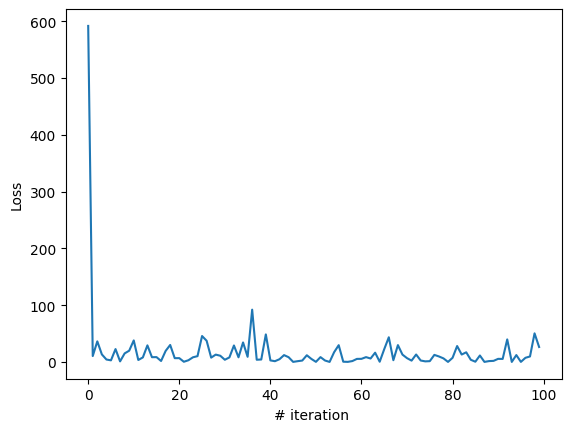

In [50]:
def implement_linear_regression(X_feature , y_ouput , epoch_max =50 , lr =1e-5) :

  losses = []
  weights = initialize_params ()
  N = len( y_ouput)
  for epoch in range(epoch_max):

    for i in range(N):
      # get a sample - row i
      features_i = X_feature[i]
      y = y_ouput[i]

      # compute output
      y_hat = predict(features_i , weights)

      # compute loss
      loss = compute_loss (y , y_hat)

      # compute gradient w1 , w2 , w3 , b
      dl_dweights = compute_gradient_w(features_i , y , y_hat)

      # update parameters
      weights = update_weight(weights , dl_dweights , lr)

      # logging
      losses.append(loss)
  return weights , losses

X , y = prepare_data ('/content/advertising.csv')
W , L = implement_linear_regression (X , y)
plt.plot(L [0:100])
plt.xlabel ("# iteration ")
plt.ylabel ("Loss")
plt.show ()

In [53]:
X , y = prepare_data ( '/content/advertising.csv')
W , L = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
# Print loss value at iteration 9999
print (L[9999])

31.339223408109948
